<a href="https://colab.research.google.com/github/mrpep/specaugment_tf_keras/blob/main/SpecAugment_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/mrpep/specaugment_tf_keras.git
%cd specaugment_tf_keras

Cloning into 'specaugment_tf_keras'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 13 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), done.
/content/specaugment_tf_keras


In [6]:
from spec_augment import SpecAugment
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [7]:
x = tf.keras.layers.Input((16000,))
spec = tf.abs(tf.signal.stft(x,frame_length=256,frame_step=128))
spec = SpecAugment()(spec)

model = tf.keras.Model(inputs=x,outputs=spec)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 16000)]           0         
_________________________________________________________________
tf.signal.stft_2 (TFOpLambda (None, 124, 129)          0         
_________________________________________________________________
tf.math.abs_2 (TFOpLambda)   (None, 124, 129)          0         
_________________________________________________________________
spec_augment_2 (SpecAugment) (None, 124, 129)          15996     
Total params: 15,996
Trainable params: 15,996
Non-trainable params: 0
_________________________________________________________________


In [13]:
results = model(np.random.uniform(low=-1,high=1,size=(64,16000)),training=True)

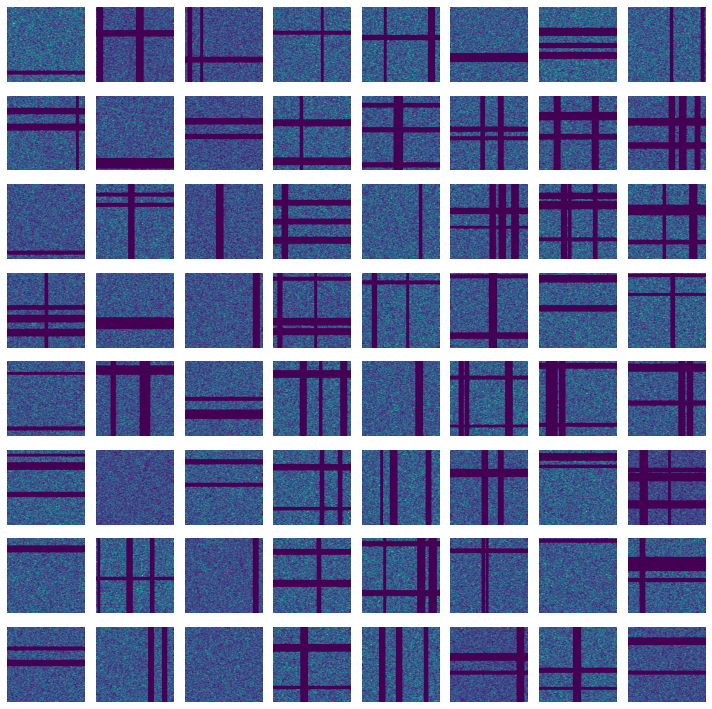

In [15]:
fig, axs = plt.subplots(8, 8, figsize=(10,10))

for i,res in enumerate(results):
  axs[i//8,i%8].imshow(res)
  axs[i//8,i%8].axis('off')
plt.tight_layout()